In [1]:
# Aula 15 IABD Kmeans - revisão
import pandas as pd # biblioteca que permite criar a base de dados
import matplotlib.pyplot as plt # plota gráficos
from sklearn.cluster import KMeans # biblioteca aprendizado nao supervisionado Kmeans
import seaborn as sns # importa biblioteca seaborn
from mpl_toolkits.mplot3d import Axes3D #biblioteca graficos 3d



In [2]:
# cria base de dados
dados = pd.DataFrame({
    'Símbolo':["AAPL","Google","MSFT","AMZN","TSLA","FB"],
    'Preço':[150.12,2700.45,300.89,3200.10,700.78,350.40],
    'Volume de negociação':[3000000,1000000, 2500000,  1200000,5000000,900000 ],
    'Capitalização de mercado':[2000000000000, 1800000000000,2200000000000
                                 ,1700000000000,
                                750000000000 , 
                                900000000000   ]

})

In [3]:
dados.head() # exibe as primeiras linhas do dataframe

,Símbolo,Preço,Volume de negociação,Capitalização de mercado
0,AAPL,150.12,3000000,2000000000000
1,Google,2700.45,1000000,1800000000000
2,MSFT,300.89,2500000,2200000000000
3,AMZN,3200.10,1200000,1700000000000
4,TSLA,700.78,5000000,750000000000


In [4]:
dados.tail() #exibe as ultimas linhas do dataframe

,Símbolo,Preço,Volume de negociação,Capitalização de mercado
1,Google,2700.45,1000000,1800000000000
2,MSFT,300.89,2500000,2200000000000
3,AMZN,3200.10,1200000,1700000000000
4,TSLA,700.78,5000000,750000000000
5,FB,350.40,900000,900000000000


Text(0.5, 1.0, 'Box plot Símbolo x Preço da ação')

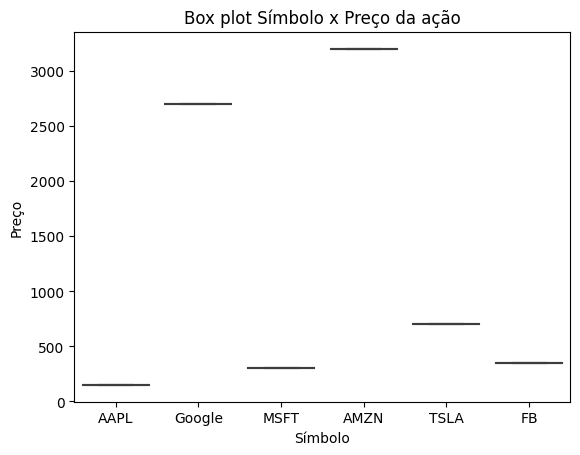

In [5]:
sns.boxplot(x=dados['Símbolo'],y=dados['Preço']) #plota boxplot com seaborn
# x - eixo x y - eixo y
plt.title("Box plot Símbolo x Preço da ação")

In [6]:
# transformação dos dados
dados_ativos = pd.get_dummies(dados,columns=['Símbolo']) # aplica o get dummies 
#para transformar variaveis categóricas em numericas

In [7]:
dados_ativos

,Preço,Volume de negociação,Capitalização de mercado,Símbolo_AAPL,Símbolo_AMZN,Símbolo_FB,Símbolo_Google,Símbolo_MSFT,Símbolo_TSLA
0,150.12,3000000,2000000000000,True,False,False,False,False,False
1,2700.45,1000000,1800000000000,False,False,False,True,False,False
2,300.89,2500000,2200000000000,False,False,False,False,True,False
3,3200.10,1200000,1700000000000,False,True,False,False,False,False
4,700.78,5000000,750000000000,False,False,False,False,False,True
5,350.40,900000,900000000000,False,False,True,False,False,False


In [8]:
# aplicando algoritmo de aprendizdo não supervisionado
kmeans = KMeans(n_clusters=3) # aplicando kmeans com 4 clusters
kmeans.fit(dados_ativos) #aplica o algoritmo kmeans no conjunto de dados

C:\Users\dsadm\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [9]:
# avaliar a métrica do kmeans
sse = kmeans.inertia_
print(sse)

3.6250000008549994e+22


In [10]:
# Visualizar os resultados do agrupamento
labels = kmeans.labels_ # Nomes dos itens do agrupamento
centroids = kmeans.cluster_centers_ # Valores do interior do agrupamento

Text(0, 0.5, 'Preço')

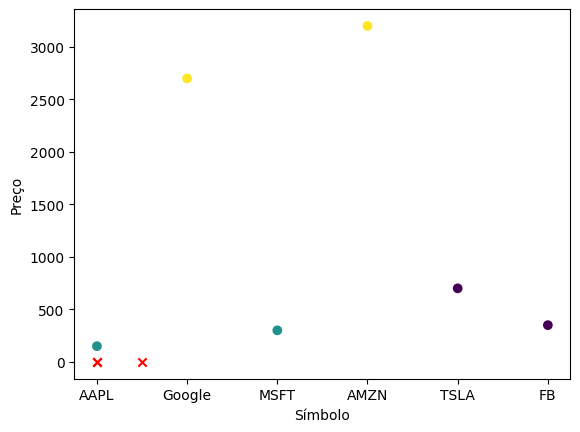

In [11]:
# Plotando o gráfico das visualizações

plt.scatter(dados['Símbolo'],dados['Preço'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("Símbolo")
plt.ylabel("Preço")

In [12]:
# Passo 7: Analisar os grupos resultantes
dados_ativos['Grupo'] = labels # armazena os labels dos grupos restantes
grouped_data = dados_ativos.groupby('Grupo').mean() # agrupa os grupos com a media
print(grouped_data)

          Preço  Volume de negociação  Capitalização de mercado  Símbolo_AAPL  \
Grupo                                                                           
0       525.590             2950000.0              8.250000e+11           0.0   
1       225.505             2750000.0              2.100000e+12           0.5   
2      2950.275             1100000.0              1.750000e+12           0.0   

       Símbolo_AMZN  Símbolo_FB  Símbolo_Google  Símbolo_MSFT  Símbolo_TSLA  
Grupo                                                                        
0               0.0         0.5             0.0           0.0           0.5  
1               0.0         0.0             0.0           0.5           0.0  
2               0.5         0.0             0.5           0.0           0.0  


In [13]:
print(centroids) # printa o valor da distancia entre os pontos

[[5.255900e+02 2.950000e+06 8.250000e+11 0.000000e+00 0.000000e+00
  5.000000e-01 0.000000e+00 0.000000e+00 5.000000e-01]
 [2.255050e+02 2.750000e+06 2.100000e+12 5.000000e-01 0.000000e+00
  0.000000e+00 0.000000e+00 5.000000e-01 0.000000e+00]
 [2.950275e+03 1.100000e+06 1.750000e+12 0.000000e+00 5.000000e-01
  0.000000e+00 5.000000e-01 0.000000e+00 0.000000e+00]]


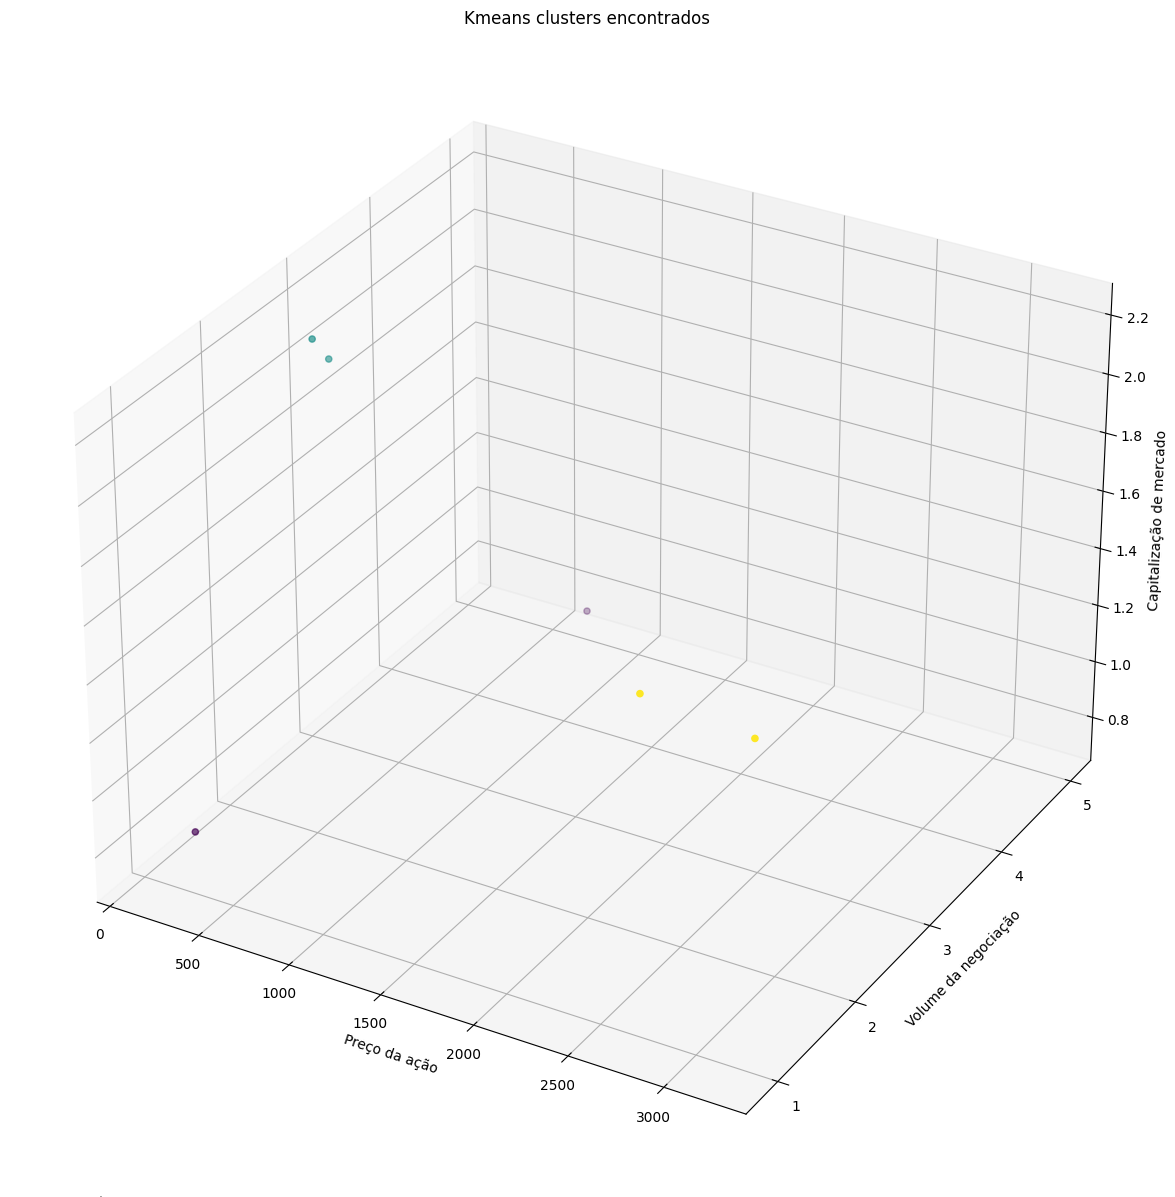

In [14]:
# Criando o gráfico em 3D
from mpl_toolkits.mplot3d import Axes3D
# Criando o gráfico em 3D
fig = plt.figure(figsize=(15,15)) # ajusta o tamanho da figura
ax = fig.add_subplot(111, projection='3d') # cria variável para armazenar a figura
ax.scatter(dados['Preço'], dados['Volume de negociação'], dados['Capitalização de mercado'], c=labels)


ax.set_title('Kmeans clusters encontrados' )
ax.set_xlabel('Preço da ação')
ax.set_ylabel('Volume da negociação')
ax.set_zlabel('Capitalização de mercado')

plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# Gerar dados fictícios de ações
np.random.seed(0)
n_samples = 100
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'FB']
prices = np.random.uniform(50, 4000, n_samples)
volume = np.random.randint(100000, 5000000, n_samples)
market_cap = np.random.uniform(1e10, 2e12, n_samples)

data = pd.DataFrame({'Símbolo': np.random.choice(symbols, n_samples),
                     'Preço da Ação': prices,
                     'Volume de Negociação': volume,
                     'Capitalização de Mercado': market_cap})

# Realizar o agrupamento com K-Means
data = pd.get_dummies(data, columns=['Símbolo'], drop_first=True)
features = data[['Preço da Ação', 'Volume de Negociação', 'Capitalização de Mercado']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='2d')

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(x=cluster_data['Preço da Ação'], y=cluster_data['Volume de Negociação'],c= cluster_data['Capitalização de Mercado'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Volume de Negociação')
ax.set_zlabel('Capitalização de Mercado')
ax.set_title(f'Agrupamento de Ações da Bolsa de Valores ')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

C:\Users\dsadm\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Unknown projection '2d'

<Figure size 1500x1500 with 0 Axes>

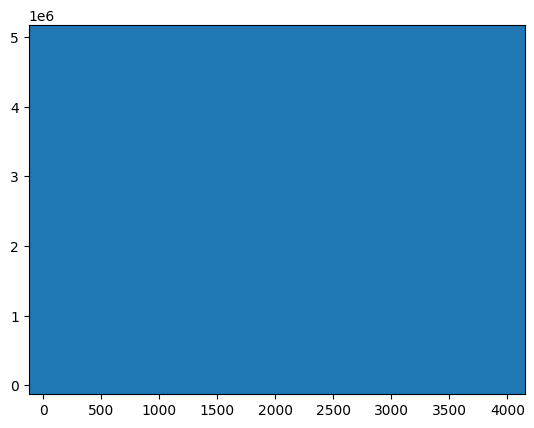

In [25]:


plt.scatter(data['Preço da Ação'], data['Volume de Negociação'], data['Capitalização de Mercado'], label=f'Cluster {cluster}')